In [2]:
from prac_code.tables import start

In [7]:
start()

In [3]:
import pandas as pd
from prac_code.value import Value
tab1 = pd.read_csv("tables/tab1.tab", sep="\t")
tab1.OB = tab1.OB.apply(Value) + Value(values=[0.0], syst=0.5)
tab1.OD = tab1.OD.apply(Value) + Value(values=[0.0], syst=0.5)
tab1

,OB,OD
0,0.0 ± 0.5,0.0 ± 0.5
1,4.0 ± 0.5,5.0 ± 0.5
2,5.0 ± 0.5,8.0 ± 0.5
3,6.0 ± 0.5,10.0 ± 0.5
4,7.0 ± 0.5,12.0 ± 0.5
5,8.0 ± 0.5,14.0 ± 0.5
6,9.0 ± 0.5,16.0 ± 0.5
7,10.0 ± 0.5,16.0 ± 0.5
8,11.0 ± 0.5,17.0 ± 0.5
9,15.0 ± 0.5,19.0 ± 0.5


In [4]:
tab2 = pd.read_csv("tables/tab2.tab", sep="\t")
tab2.OA = tab2.OA.apply(Value) + Value(values=[0.0], syst=0.5)
tab2.OC = tab2.OC.apply(Value) + Value(values=[0.0], syst=0.5)
tab2.OB = tab2.OB.apply(Value) + Value(values=[0.0], syst=0.5)
tab2.OD = tab2.OD.apply(Value) + Value(values=[0.0], syst=0.5)
tab2

,OA,OB,OC,OD,f
0,4.0 ± 0.5,40.0 ± 0.5,14.0 ± 0.5,22.0 ± 0.5,300
1,4.0 ± 0.5,40.0 ± 0.5,13.0 ± 0.5,21.0 ± 0.5,400


In [5]:
r1 = 10.5e-03
r2 = 15.5e-03
h = 6.5e-03
R1 = 24
R3 = 43e+03
C = 4.0e-06
N1 = N2 = 500
Cx = 63
Cy = 10
S = h * (r2 - r1)
from math import pi
l = 2 * pi * (r1 + r2) / 2
n1 = 500 / l

Упражнение 1

In [6]:
tab2["Hc"] = n1 * Cx / R1 * tab2.OA / 1000
tab2["Bost"] = R3 * C * tab2.OC * Cy / N2 / S / 1000
tab2["Bs"] = R3 * C * tab2.OD * Cy / N2 / S / 1000
tab2["Hs"] = n1 * Cx / R1 * tab2.OB / 1000
tab2

,OA,OB,OC,OD,f,Hc,Bost,Bs,Hs
0,4.0 ± 0.5,40.0 ± 0.5,14.0 ± 0.5,22.0 ± 0.5,300,64 ± 8,1.48 ± 0.05,2.33 ± 0.05,643 ± 8
1,4.0 ± 0.5,40.0 ± 0.5,13.0 ± 0.5,21.0 ± 0.5,400,64 ± 8,1.38 ± 0.05,2.22 ± 0.05,643 ± 8


Упражнение 2

In [7]:
tab1["B"] = R3 * C * tab1.OD * Cy / N2 / S / 1000
tab1["H"] = n1 * Cx / R1 * tab1.OB / 1000
mu = tab1["B"][1::] / (4 * pi * 10**-7 * tab1["H"][1::])

In [8]:
tab1

,OB,OD,B,H
0,0.0 ± 0.5,0.0 ± 0.5,0.00 ± 0.05,0 ± 8
1,4.0 ± 0.5,5.0 ± 0.5,0.53 ± 0.05,64 ± 8
2,5.0 ± 0.5,8.0 ± 0.5,0.85 ± 0.05,80 ± 8
3,6.0 ± 0.5,10.0 ± 0.5,1.06 ± 0.05,96 ± 8
4,7.0 ± 0.5,12.0 ± 0.5,1.27 ± 0.05,112 ± 8
5,8.0 ± 0.5,14.0 ± 0.5,1.48 ± 0.05,129 ± 8
6,9.0 ± 0.5,16.0 ± 0.5,1.69 ± 0.05,145 ± 8
7,10.0 ± 0.5,16.0 ± 0.5,1.69 ± 0.05,161 ± 8
8,11.0 ± 0.5,17.0 ± 0.5,1.80 ± 0.05,177 ± 8
9,15.0 ± 0.5,19.0 ± 0.5,2.01 ± 0.05,241 ± 8


In [9]:
from prac_code.plotter import Plotter

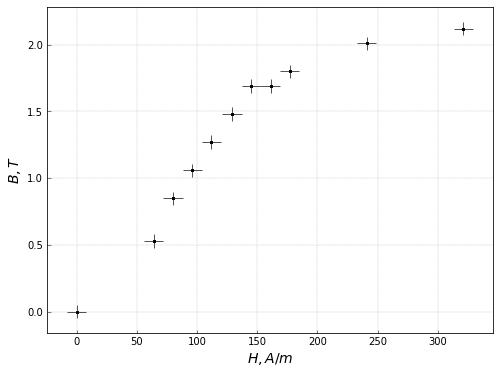

[]

In [10]:
Plotter(draw_legend=False).set_name("305B").set_title("").set_y_name("$B, T$").set_x_name(
        "$H, A/m$"). \
        add_line(Plotter.get_new_line(y_value=tab1.B, x_value=tab1.H,
                                      draw_error=True, legend='$P_1$', fit=False, color='black', marker="s")).\
        plot(show=True, save=True)

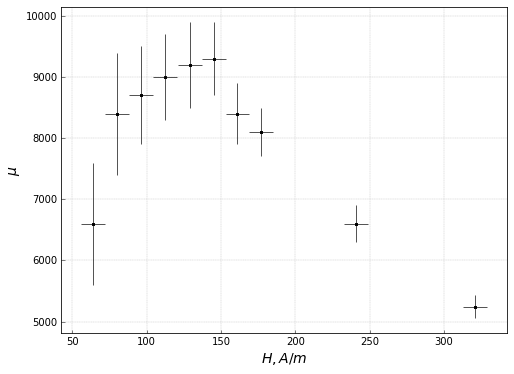

[]

In [11]:
Plotter(draw_legend=False).set_name("305mu").set_title("").set_y_name("$\mu$").set_x_name(
        "$H, A/m$"). \
        add_line(Plotter.get_new_line(y_value=mu, x_value=tab1.H[1::],
                                      draw_error=True, legend='$P_1$', fit=False, color='black', marker="s")).\
        plot(show=True, save=True)

In [12]:
print(tab1.to_csv())

,OB,OD,B,H
0,0.0 ± 0.5,0.0 ± 0.5,0.00 ± 0.05,0 ± 8
1,4.0 ± 0.5,5.0 ± 0.5,0.53 ± 0.05,64 ± 8
2,5.0 ± 0.5,8.0 ± 0.5,0.85 ± 0.05,80 ± 8
3,6.0 ± 0.5,10.0 ± 0.5,1.06 ± 0.05,96 ± 8
4,7.0 ± 0.5,12.0 ± 0.5,1.27 ± 0.05,112 ± 8
5,8.0 ± 0.5,14.0 ± 0.5,1.48 ± 0.05,129 ± 8
6,9.0 ± 0.5,16.0 ± 0.5,1.69 ± 0.05,145 ± 8
7,10.0 ± 0.5,16.0 ± 0.5,1.69 ± 0.05,161 ± 8
8,11.0 ± 0.5,17.0 ± 0.5,1.80 ± 0.05,177 ± 8
9,15.0 ± 0.5,19.0 ± 0.5,2.01 ± 0.05,241 ± 8
10,20.0 ± 0.5,20.0 ± 0.5,2.12 ± 0.05,321 ± 8



In [13]:
print(tab2.to_csv())

,OA,OB,OC,OD,f,Hc,Bost,Bs,Hs
0,4.0 ± 0.5,40.0 ± 0.5,14.0 ± 0.5,22.0 ± 0.5,300,64 ± 8,1.48 ± 0.05,2.33 ± 0.05,643 ± 8
1,4.0 ± 0.5,40.0 ± 0.5,13.0 ± 0.5,21.0 ± 0.5,400,64 ± 8,1.38 ± 0.05,2.22 ± 0.05,643 ± 8

